In [1]:
import cv2
# from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def cv2_imshow(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.show()

In [3]:
# !git clone https://github.com/matzim95/ML-datasets

# Powtórzenie

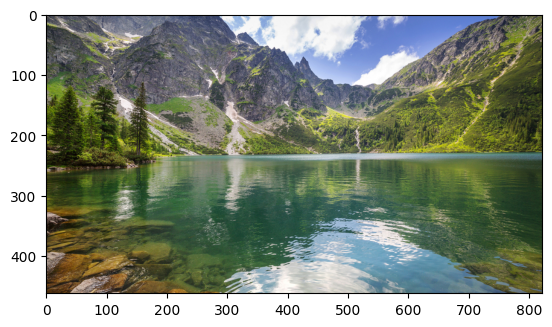

In [4]:
# wczytanie obrazu
img = cv2.imread('ML-datasets/images/gory_lc.png')
# wyświetlenie obrazu
cv2_imshow(img)

In [5]:
img

array([[[ 73,  68,  69],
        [ 72,  62,  62],
        [ 84,  78,  79],
        ...,
        [ 78,  76,  76],
        [ 39,  32,  29],
        [ 53,  60,  57]],

       [[ 87,  82,  83],
        [ 74,  66,  66],
        [ 77,  70,  67],
        ...,
        [ 63,  61,  61],
        [ 74,  93,  98],
        [ 96, 116, 121]],

       [[ 80,  69,  71],
        [ 85,  80,  77],
        [ 87,  78,  74],
        ...,
        [102, 121, 128],
        [109, 128, 135],
        [ 92, 104, 108]],

       ...,

       [[ 20,  38,  67],
        [ 18,  38,  63],
        [ 17,  40,  66],
        ...,
        [ 85,  88,  86],
        [100,  96,  85],
        [115, 101,  83]],

       [[ 17,  47,  74],
        [ 14,  48,  78],
        [ 13,  50,  76],
        ...,
        [ 34,  79,  92],
        [ 38,  73,  86],
        [ 50,  80,  85]],

       [[ 16,  50,  80],
        [  9,  43,  73],
        [  9,  48,  76],
        ...,
        [ 42,  84,  97],
        [ 42,  85,  94],
        [ 40,  87,  95]]

Wyświetl rozmiar obrazu:

In [6]:
size = img.shape
size

(462, 822, 3)

Co oznacza każdy z wymiarów?

In [7]:
h = img.shape[0]
w = img.shape[1]
c = img.shape[2]

Wyświetl obraz w skali szarości:

In [7]:
grey = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

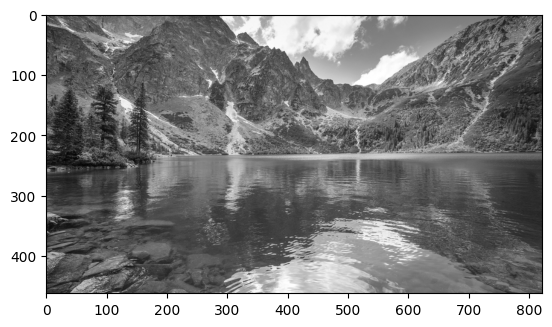

In [8]:
cv2_imshow(grey)

In [10]:
grey

array([[ 69,  63,  79, ...,  76,  32,  58],
       [ 83,  67,  70, ...,  61,  92, 115],
       [ 71,  80,  78, ..., 121, 128, 104],
       ...,
       [ 45,  43,  45, ...,  87,  93,  97],
       [ 52,  53,  54, ...,  78,  73,  78],
       [ 55,  48,  52, ...,  83,  83,  84]], dtype=uint8)

Jak zmieni się rozmiar obrazu po tej zmianie?

In [9]:
new_size = grey.shape
new_size

(462, 822)

In [12]:
def apply_filter(source, kernel):
    new_image = cv2.filter2D(source, -1, kernel)
    return new_image

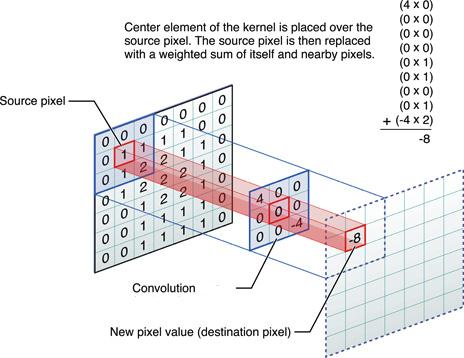

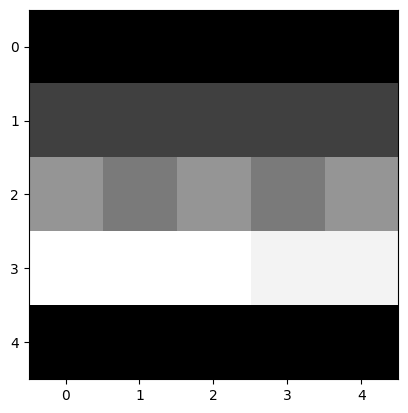

In [13]:
# nasz "obrazek" - tablica liczb (0-1)
img = np.array([
    [1, 1, 1, 1, 1], 
    [0.8, 0.8, 0.8, 0.8, 0.8], 
    [0.5, 0.6, 0.5, 0.6, 0.5], 
    [0, 0, 0, 0.1, 0.1], 
    [1, 1, 1, 1, 1]
], dtype=np.float64)
plt.imshow(img, cmap='Greys', vmin=0, vmax=1)

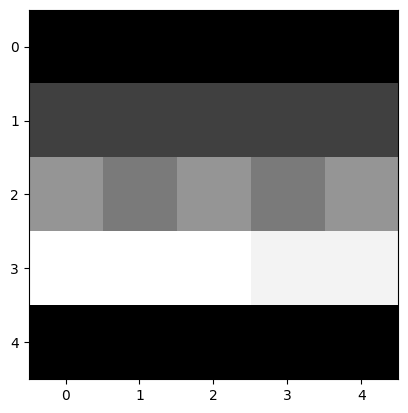

In [17]:
# filtr "identity" - zwraca to, co dostał na wejściu
identity = np.array([[0,0,0],
                     [0,1,0],
                     [0,0,0]])
result = apply_filter(img, identity)
plt.imshow(result, cmap='Greys', vmin=0, vmax=1)

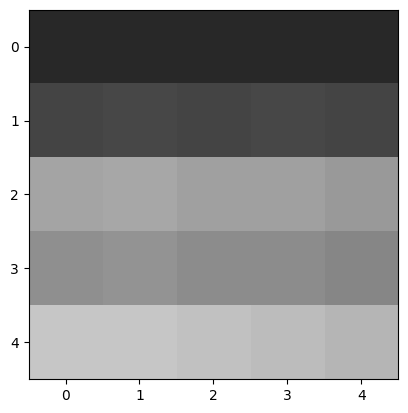

In [18]:
# rozmycie - średnia z piksela głównego i 8 wokół nich
blur = np.ones((3,3), np.float32) / 9
result = apply_filter(img, blur)
plt.imshow(result, cmap='Greys', vmin=0, vmax=1)

In [19]:
# tak wygląda wynik w postaci macierzy
result

array([[0.86666667, 0.86666667, 0.86666667, 0.86666667, 0.86666667],
       [0.78888889, 0.77777778, 0.78888889, 0.77777778, 0.78888889],
       [0.45555556, 0.44444445, 0.46666667, 0.46666667, 0.48888889],
       [0.52222223, 0.51111111, 0.53333334, 0.53333334, 0.55555556],
       [0.33333334, 0.33333334, 0.35555556, 0.37777778, 0.4       ]])

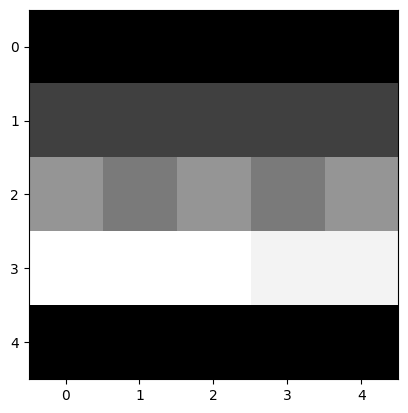

In [20]:
plt.imshow(img, cmap='Greys', vmin=0, vmax=1)

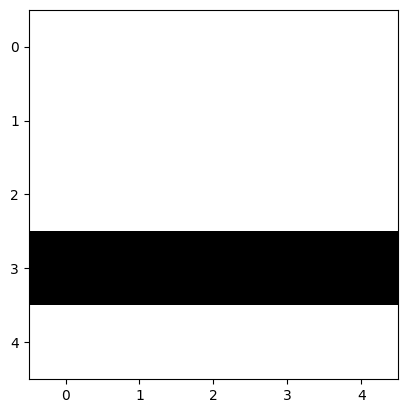

In [21]:
# wykrywa krawędzie (mocna zmiana koloru) góra-dół
bottom_sobel = np.array([[-1,-2,-1],
                     [0,0,0],
                     [1,2,1]])
result = apply_filter(img, bottom_sobel)
plt.imshow(result, cmap='Greys', vmin=0, vmax=1)

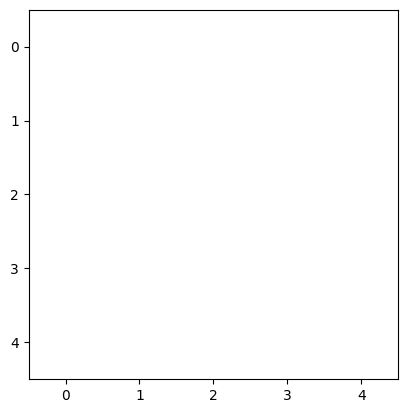

In [22]:
# wykrywa krawędzie (mocna zmiana koloru) prawo-lewo
left_sobel = np.array([[1,0,-1],
                     [2,0,-2],
                     [1,0,-1]])
result = apply_filter(img, left_sobel)
plt.imshow(result, cmap='Greys', vmin=0, vmax=1)

# CNN

Kolejną rzeczą, którą należy zapamiętać, jest pipeline przetwarzania:

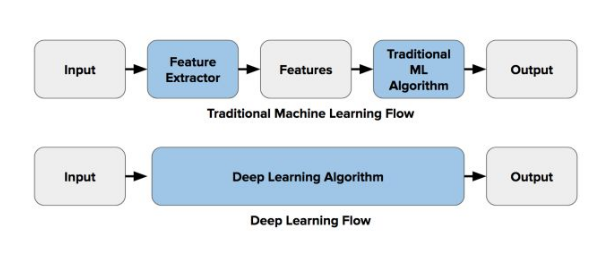

W "tradycyjnym" podejściu sami musimy wyznaczyć cechy i algorytm klasyfikacji, w podejściu Deep Learning/CNN - cechy są wyznaczane przez sieć

Generalna zasada konwolucji:
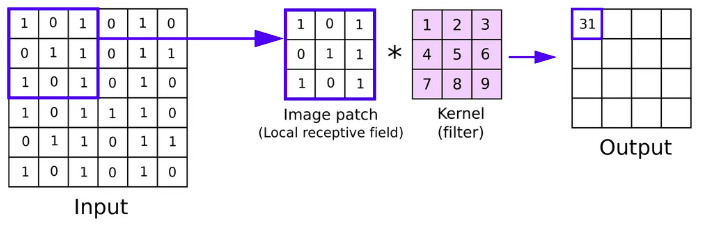

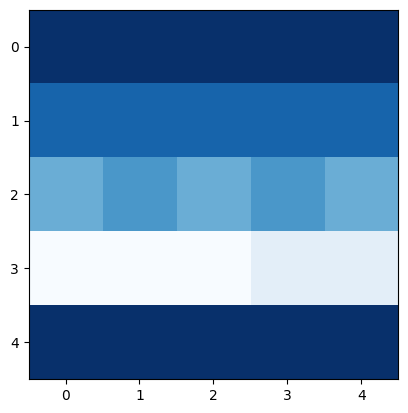

In [23]:
# obrazek wejściowy
img = np.array([[1, 1, 1, 1, 1], [0.8, 0.8, 0.8, 0.8, 0.8], [0.5, 0.6, 0.5, 0.6, 0.5], [0, 0, 0, 0.1, 0.1], [1, 1, 1, 1, 1]], dtype=np.float64)
plt.imshow(img, cmap='Blues', vmin=0, vmax=1)

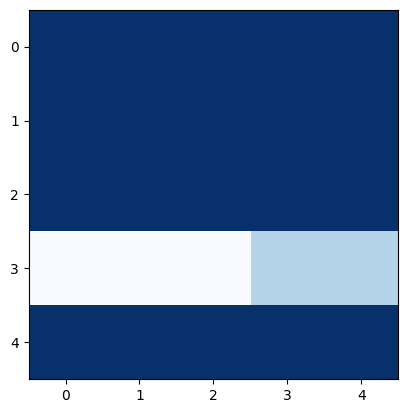

In [24]:
# możliwy filtr konwolucyjny powodujący "wzmocnienie" niebieskiego - łatwiej go rozpoznać
magnifier = np.array([[0,0,0],
                     [0,3,0],
                     [0,0,0]])
result = apply_filter(img, magnifier)
plt.imshow(result, cmap='Blues', vmin=0, vmax=1)

Padding:
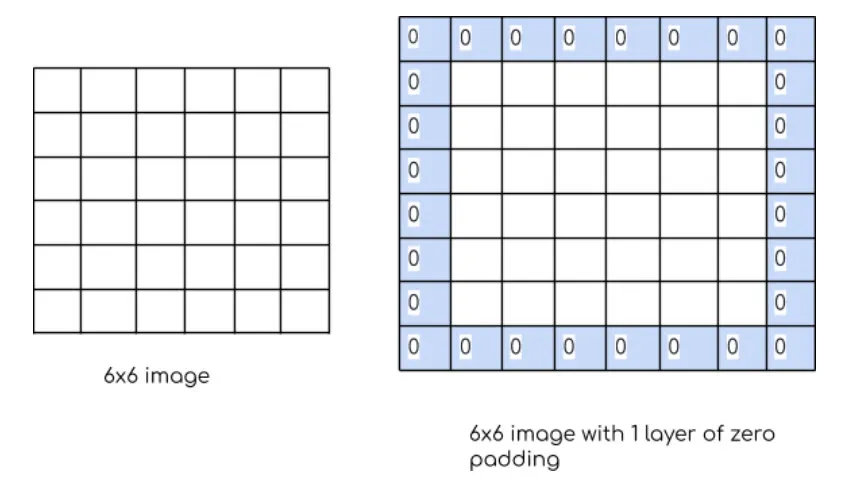

Stride:
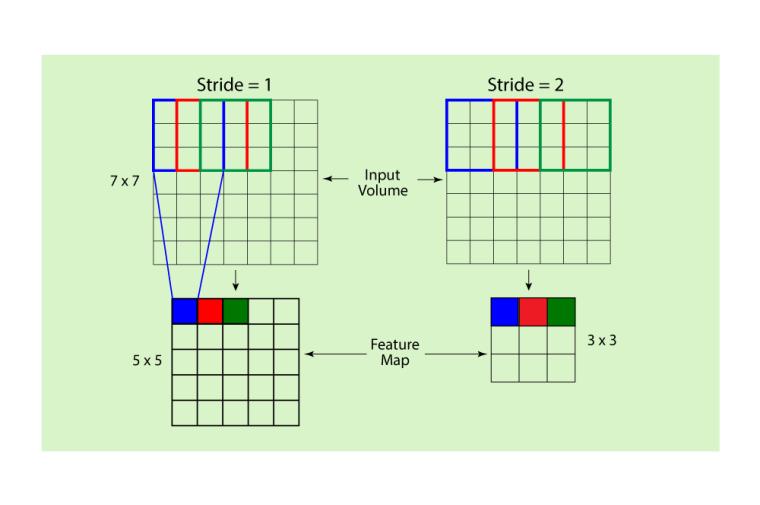

Pooling:
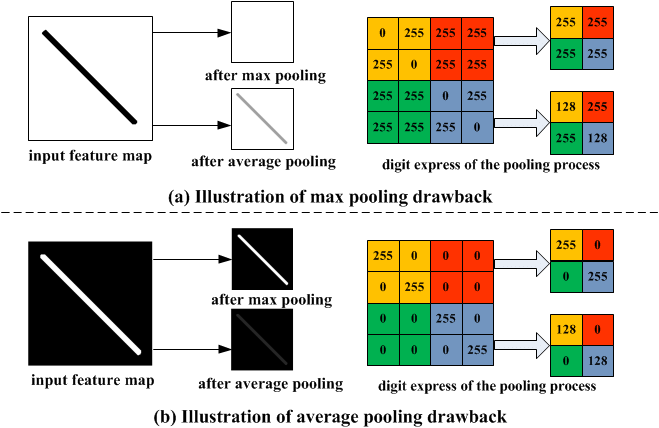

In [25]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import tensorflow as tf
from tensorflow.keras.models import Sequential

#budowa modelu
model = Sequential()
# C1
model.add(Conv2D(6, (5, 5), activation='relu', kernel_initializer='he_uniform',
                 input_shape=(32,32,3)))
# S2
model.add(MaxPooling2D((2,2)))

# C3
model.add(Conv2D(16, (5, 5), activation='relu', kernel_initializer='he_uniform'))
# S4
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
# C5
model.add(Dense(120, activation='relu', kernel_initializer='he_uniform'))
#F6
model.add(Dense(84, activation='relu', kernel_initializer='he_uniform'))
# Output
model.add(Dense(10, activation='softmax'))

#kompilacja modelu
opt = tf.keras.optimizers.SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

2023-06-17 09:47:24.897809: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-17 09:47:25.960901: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-17 09:47:25.967817: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-17 09:47:28.791912: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-06-17 09:47:33.123250: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Do

Generalna architektura sieci CNN:
(subsampling=pooling)
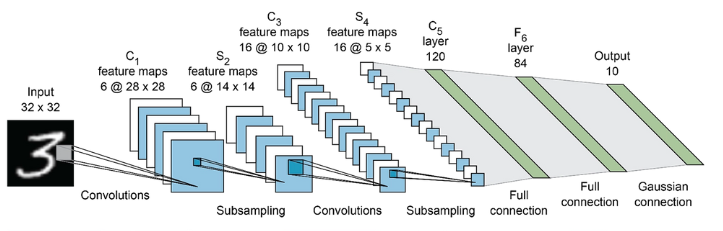

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         456       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 6)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 400)               0         
                                                                 
 dense (Dense)               (None, 120)               4

## Wczytanie danych i uczenie modelu

In [34]:
import keras
from tensorflow.keras.utils import to_categorical

In [35]:
# wczytanie danych
(train_x, train_y), (test_x, test_y) = keras.datasets.cifar10.load_data()

# 0-255 to 0-1
train_x = train_x/255 
test_x = test_x/255

# Change the labels from integer to categorical data
train_y_one_hot = to_categorical(train_y) 
test_y_one_hot = to_categorical(test_y)

In [111]:
# trenowanie
history = model.fit(train_x, train_y_one_hot,
                   batch_size=64, epochs=30, verbose=True,
                   validation_data=(test_x, test_y_one_hot))

2023-06-16 17:54:46.581254: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 614400000 exceeds 10% of free system memory.


Epoch 1/3
782/782 [==============================] - ETA: 0s - loss: 1.6181 - accuracy: 0.4109

2023-06-16 17:57:56.522296: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 122880000 exceeds 10% of free system memory.


782/782 [==============================] - 198s 250ms/step - loss: 1.6181 - accuracy: 0.4109 - val_loss: 1.2758 - val_accuracy: 0.5360
Epoch 2/3
782/782 [==============================] - 192s 245ms/step - loss: 1.1644 - accuracy: 0.5822 - val_loss: 1.1360 - val_accuracy: 0.5946
Epoch 3/3
782/782 [==============================] - 201s 257ms/step - loss: 0.9356 - accuracy: 0.6676 - val_loss: 0.8965 - val_accuracy: 0.6856
